# Linear Regression notebook

Contains:
- Linear Regression model from scratch in pure python.
- Test train performance of model.
- Find ideal learning rate.

In [142]:
import random
import sklearn
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


class LinearRegression:
    def __init__(self, iterations, lr):
        self.iterations = iterations
        self.lr = lr

        self.n = None
        self.m = None

        self.gradient_beta = None
        self.gradient_beta_other = None

        self.beta = None
        self.beta_others = None
        
        self.loss = []

    def init_params(self):
        self.beta = 0
        self.beta_others = [random.random() for _ in range(self.n)]

    def compute_gradients(self, x, y):
        self.gradient_beta = 0
        self.gradient_beta_other = [0] * self.n
        loss = 0

        for i in range(self.m):
            y_i_hat = sum(x[i][j] * self.beta_others[j] for j in range (self.n)) + self.beta
            derror_dy = 2 * (y[i] - y_i_hat)
            loss += derror_dy
            for j in range(self.n):
                self.gradient_beta_other[j] += derror_dy * x[i][j] / self.n
            self.gradient_beta += derror_dy / self.n
        return loss

    def update_params(self):
        self.beta += self.gradient_beta * self.lr
        for i in range(self.n):
            self.beta_others[i] += (self.gradient_beta_other[i] * self.lr)


    def train(self, x, y):
        self.n, self.m = len(x[0]), len(x)
        self.init_params()

        for _ in range(self.iterations):
            loss = self.compute_gradients(x, y)
            self.update_params()
            self.loss.append(loss)

    def predict(self, x):
        r = []
        for i in x:
            res = 0
            for x_i, beta_i in zip(i, self.beta_others):
                res += x_i * beta_i
            r.append(res + self.beta)
        return r

# Dataset

In [171]:
# Generate regression dataset according to y = ax + b + epsilon
x, y, y_clean = [], [], []
a = 1.5
b = 1
for i in range(0, 20):
    x_i = 0.2 * i
    eps = random.uniform(-1, 1)
    y_i = a * x_i + b + 2 * eps
    x.append([x_i])
    y.append(y_i)
    y_clean.append(y_i - 2 * eps)

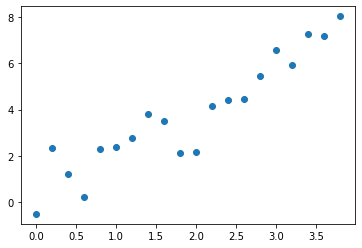

In [172]:
plt.scatter(x,y)
plt.show()

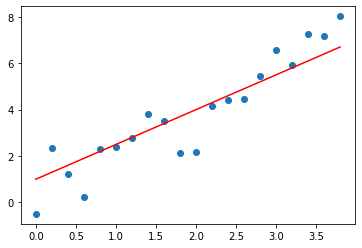

In [173]:
plt.scatter(x, y)
plt.plot(x, y_clean, c="red")
plt.show()

# Train model

In [174]:
model = LinearRegression(iterations=100, lr=0.001)

In [175]:
model.train(x, y)

In [176]:
y_pred = model.predict(x)

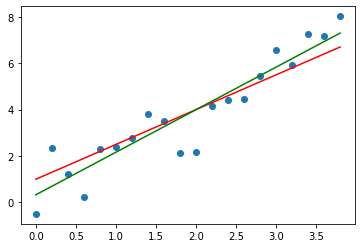

In [177]:
plt.scatter(x, y)
plt.plot(x, y_clean, c="red")
plt.plot(x, y_pred, c="green")
plt.show()

# Tuning the learning rate

In [178]:
learning_rates = [0.001, 0.0001, 0.00005, 0.00001]

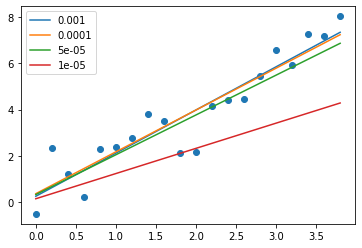

In [183]:
plt.scatter(x, y)
losses = []
for lr in learning_rates:
    model = LinearRegression(iterations=200, lr=lr)
    model.train(x, y)
    y_pred = model.predict(x)
    plt.plot(x, y_pred, label=lr)
    losses.append(model.loss)
plt.legend()
plt.show()

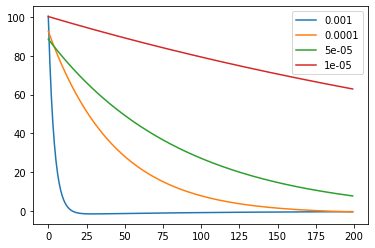

In [184]:
x_loss = [i for i in range(200)]
for loss, lr in zip(losses, learning_rates):
    plt.plot(x_loss, loss, label=lr)
plt.legend()
plt.show()